<div class="alert alert-vlock alert-info"> Exploratory data analysis of hotels in London Part II </div>

<div class="alert alert-vlock alert-info"> Importing libraries </div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.util import ngrams
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import re,string,unicodedata

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Marko\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<div class="alert alert-vlock alert-info"> Importing data </div>

In [2]:
df = pd.read_csv("new_London_hotel_reviews.csv", encoding='latin-1')
pd.set_option('max_colwidth', 500)
df.head(5)

,Unnamed: 0,Property_Name,Review_Rating,Review_Title,Date_Review,Review_Text
0,1,Corinthia Hotel London,5,"By far, my best hotel in the world",3/23/2016,"i had a pleasure of staying in this hotel for 7 nights recently. this hotel was perfect in every way. communication with the hotel before staying was prompt, and very efficient. checking in was a breeze. you go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. my room, they gave me an upgrade to junior suite, was spectacular. we had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day s..."
1,2,The Savoy,5,First visit to the American Bar at the Savoy,7/30/2013,"a very lovely first visit to this iconic hotel bar! | wonderful service, without being intrusive at all! very delicious cocktails and just generally all round, a very indulgent experience. | well worth visiting only for that 'once in a lifetime' experience, though do make sure you are feeling 'flush' it doesn't come cheap!"
2,3,Rhodes Hotel,4,Nice stay,6/2/2012,"3 of us stayed at the rhodes hotel for 4 nights, its a great location for taking the paddington express from heathrow. we like the location clost to the partk and in walking distance of most locations. the room and bath were small compared to american hotels but very clean. we enjoyed the free wifi. the owners and the staff were very friendly and helpful with taxi's and resturant recomendations. we would stay there again."
3,4,The Savoy,5,Perfection,11/24/2017,form the moment we arrived until we left we experienced absolute perfection in service excellance by every member of the savoy staff. famous for its personalise service and rich heritage the savoy is truly won of the best hotels in the world to stay at. for eating and dining woud highly recommend kaspers restaurant. for ourselves we cannot wait until we return.
4,5,Corinthia Hotel London,1,Staff stole from me!!,3/1/2013,well i am no strange to london's 5star hotels and when a new one comes along i am eager to try. so i heard about the corinthia via some friends who work in the industry and said their bar was really something. until the incident i had stay there a total of 3 times but on the 4th time in june i was on my second of 4 nights and was about get some cash from my room as i was going to exchange money for some dollars as i was flying to the us pretty soon. when i came to my money it felt light. whe...


<div class="alert alert-vlock alert-info"> Checking data </div>

In [3]:
text_df=df['Review_Text']
text_df

0        i had a pleasure of staying in this hotel for 7 nights recently. this hotel was perfect in every way. communication with the hotel before staying was prompt, and very efficient. checking in was a breeze. you go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. my room, they gave me an upgrade to junior suite, was spectacular. we had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day s...
1                                                                                                                                                                                       a very lovely first visit to this iconic hotel bar! | wonderful service, without being intrusive at all! very delicious cocktails and just generally all round, a very indulgent experience. | well worth visiting only for that 'once in a lifetime' experience, though do make sure you are feeling 'flush' it do

<div class="alert alert-vlock alert-info"> Cleaning data </div>

In [4]:
df['Review_Text'] = df['Review_Text'].apply((lambda y:re.sub("http://\S+"," ", y)))
df['Review_Text'] = df['Review_Text'].apply((lambda x:re.sub("\@", " ",x.lower())))
df['Review_Text'] = df['Review_Text'].apply((lambda z:re.sub(r'[^\w\s]', '', z)))
print(df['Review_Text'])

0        i had a pleasure of staying in this hotel for 7 nights recently this hotel was perfect in every way communication with the hotel before staying was prompt and very efficient checking in was a breeze you go through the spectacular lobby with modern glass chandeliers and take the elevator to your room my room they gave me an upgrade to junior suite was spectacular we had a walkin closet of the size where you could have put a small bed in there it served us nicely for the seven day stay the dec...
1                                                                                                                                                                                                     a very lovely first visit to this iconic hotel bar  wonderful service without being intrusive at all very delicious cocktails and just generally all round a very indulgent experience  well worth visiting only for that once in a lifetime experience though do make sure you are feeling flush it 

In [6]:
stop = stopwords.words('english')
df['Review_Text']= df['Review_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
df['Review_Text']

0        pleasure staying hotel 7 nights recently hotel perfect every way communication hotel staying prompt efficient checking breeze go spectacular lobby modern glass chandeliers take elevator room room gave upgrade junior suite spectacular walkin closet size could put small bed served us nicely seven day stay decor refined oh bathroom carrera marble floor heated throughout rain shower die location turned good 5 minutes walk trafalgar square quiet right outside embankment tube stop would walk theat...
1                                                                                                                                                                                                                                                                                                  lovely first visit iconic hotel bar wonderful service without intrusive delicious cocktails generally round indulgent experience well worth visiting lifetime experience though make sure feeling flush 

<div class="alert alert-vlock alert-info"> Tokenising data </div>

In [7]:
print(df.Review_Text.head().apply(word_tokenize))

0    [pleasure, staying, hotel, 7, nights, recently, hotel, perfect, every, way, communication, hotel, staying, prompt, efficient, checking, breeze, go, spectacular, lobby, modern, glass, chandeliers, take, elevator, room, room, gave, upgrade, junior, suite, spectacular, walkin, closet, size, could, put, small, bed, served, us, nicely, seven, day, stay, decor, refined, oh, bathroom, carrera, marble, floor, heated, throughout, rain, shower, die, location, turned, good, 5, minutes, walk, trafalgar,...
1                                                                                                                                                                                                                                                                [lovely, first, visit, iconic, hotel, bar, wonderful, service, without, intrusive, delicious, cocktails, generally, round, indulgent, experience, well, worth, visiting, lifetime, experience, though, make, sure, feeling, flush, doesnt, com

<div class="alert alert-vlock alert-info"> Generating wordcloud </div>

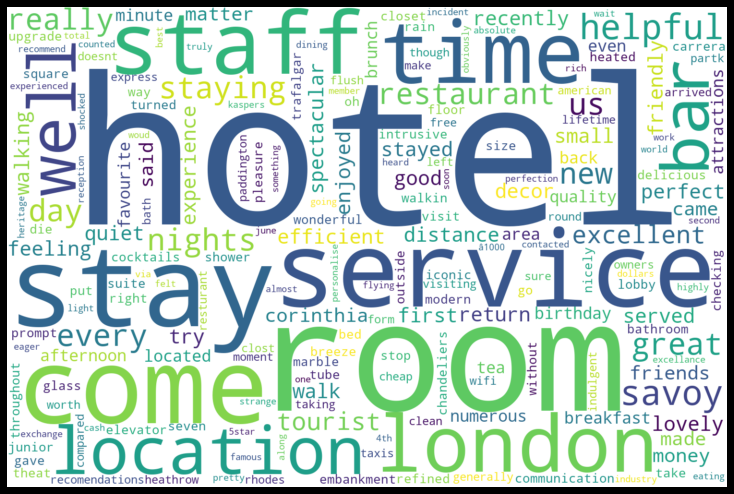

In [8]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 1500,
        height = 1000,
        background_color = 'white').generate(str(text))
    fig = plt.figure(
        figsize = (10, 10),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig("wordcloudpartII.png")
    plt.show()
generate_word_cloud(df.Review_Text)

<div class="alert alert-vlock alert-info"> Lemmatising data </div>

In [9]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word,pos="v") for word in words if word not in stopwords]

<div class="alert alert-vlock alert-info"> Preparing the data for histogram </div>

In [10]:
true_word = basic_clean(''.join(str(df['Review_Text'].tolist())))

In [11]:
tword_freq=pd.value_counts(np.array(true_word))[:20]

<div class="alert alert-vlock alert-info"> Histogram for lemmatised words </div>

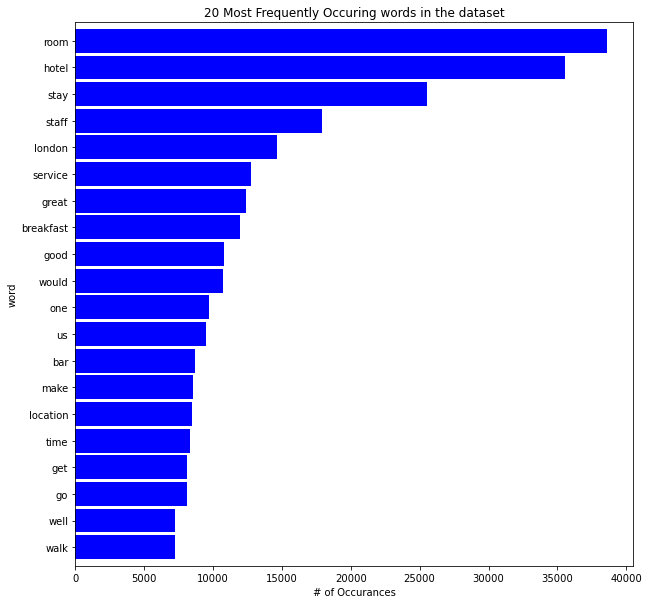

In [20]:
tword_freq.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 10))
plt.title('20 Most Frequently Occuring words in the dataset')
plt.ylabel('word')
plt.xlabel('# of Occurances')
plt.savefig("20MostFrequentlyOccuringwordsinthedataset.png", dpi=300, bbox_inches = "tight")

<div class="alert alert-vlock alert-info"> Counting N-grams </div>

<div class="alert alert-vlock alert-info"> Bigrams </div>

In [22]:
true_bigrams= (pd.Series(nltk.ngrams(true_word, 2)).value_counts())[:20]
true_bigrams

(afternoon, tea)       1720
(staff, friendly)      1638
(stay, hotel)          1576
(room, service)        1497
(tube, station)        1476
(highly, recommend)    1395
(great, location)      1344
(one, night)           1326
(hyde, park)           1283
(walk, distance)       1230
(friendly, helpful)    1205
(american, bar)        1128
(5, star)              1123
(recommend, hotel)     1115
(would, definitely)    1112
(come, back)           1059
(go, back)             1010
(room, clean)           994
(stay, savoy)           989
(room, small)           978
dtype: int64

<div class="alert alert-vlock alert-info"> Trigrams </div>

In [23]:
true_trigrams= (pd.Series(nltk.ngrams(true_word, 3)).value_counts())[:20]
true_trigrams

(stay, one, night)                548
(staff, friendly, helpful)        536
(nothing, much, trouble)          481
(within, walk, distance)          460
(would, highly, recommend)        444
(would, definitely, stay)         440
(make, us, feel)                  436
(hotel, great, location)          339
(apex, london, wall)              332
(5, star, hotel)                  313
(would, definitely, recommend)    311
(highly, recommend, hotel)        301
(south, kensington, tube)         291
(would, recommend, hotel)         244
(worth, every, penny)             241
(full, english, breakfast)        229
(victoria, albert, museum)        227
(5, minute, walk)                 224
(kensington, tube, station)       210
(royal, albert, hall)             197
dtype: int64

In [16]:
df.head(5)

,Unnamed: 0,Property_Name,Review_Rating,Review_Title,Date_Review,Review_Text
0,1,Corinthia Hotel London,5,"By far, my best hotel in the world",3/23/2016,pleasure staying hotel 7 nights recently hotel perfect every way communication hotel staying prompt efficient checking breeze go spectacular lobby modern glass chandeliers take elevator room room gave upgrade junior suite spectacular walkin closet size could put small bed served us nicely seven day stay decor refined oh bathroom carrera marble floor heated throughout rain shower die location turned good 5 minutes walk trafalgar square quiet right outside embankment tube stop would walk theat...
1,2,The Savoy,5,First visit to the American Bar at the Savoy,7/30/2013,lovely first visit iconic hotel bar wonderful service without intrusive delicious cocktails generally round indulgent experience well worth visiting lifetime experience though make sure feeling flush doesnt come cheap
2,3,Rhodes Hotel,4,Nice stay,6/2/2012,3 us stayed rhodes hotel 4 nights great location taking paddington express heathrow like location clost partk walking distance locations room bath small compared american hotels clean enjoyed free wifi owners staff friendly helpful taxis resturant recomendations would stay
3,4,The Savoy,5,Perfection,11/24/2017,form moment arrived left experienced absolute perfection service excellance every member savoy staff famous personalise service rich heritage savoy truly best hotels world stay eating dining woud highly recommend kaspers restaurant cannot wait return
4,5,Corinthia Hotel London,1,Staff stole from me!!,3/1/2013,well strange londons 5star hotels new one comes along eager try heard corinthia via friends work industry said bar really something incident stay total 3 times 4th time june second 4 nights get cash room going exchange money dollars flying us pretty soon came money felt light counted almost â1000 obviously shocked contacted reception started investigation well couple days later checkout matter resolved made pay bill full upon return london met manager hotel jean louis said matter still inves...


In [17]:
df = df[["Property_Name", "Review_Rating", "Review_Title", "Date_Review", "Review_Text"]].dropna()
df.head(5)

,Property_Name,Review_Rating,Review_Title,Date_Review,Review_Text
0,Corinthia Hotel London,5,"By far, my best hotel in the world",3/23/2016,pleasure staying hotel 7 nights recently hotel perfect every way communication hotel staying prompt efficient checking breeze go spectacular lobby modern glass chandeliers take elevator room room gave upgrade junior suite spectacular walkin closet size could put small bed served us nicely seven day stay decor refined oh bathroom carrera marble floor heated throughout rain shower die location turned good 5 minutes walk trafalgar square quiet right outside embankment tube stop would walk theat...
1,The Savoy,5,First visit to the American Bar at the Savoy,7/30/2013,lovely first visit iconic hotel bar wonderful service without intrusive delicious cocktails generally round indulgent experience well worth visiting lifetime experience though make sure feeling flush doesnt come cheap
2,Rhodes Hotel,4,Nice stay,6/2/2012,3 us stayed rhodes hotel 4 nights great location taking paddington express heathrow like location clost partk walking distance locations room bath small compared american hotels clean enjoyed free wifi owners staff friendly helpful taxis resturant recomendations would stay
3,The Savoy,5,Perfection,11/24/2017,form moment arrived left experienced absolute perfection service excellance every member savoy staff famous personalise service rich heritage savoy truly best hotels world stay eating dining woud highly recommend kaspers restaurant cannot wait return
4,Corinthia Hotel London,1,Staff stole from me!!,3/1/2013,well strange londons 5star hotels new one comes along eager try heard corinthia via friends work industry said bar really something incident stay total 3 times 4th time june second 4 nights get cash room going exchange money dollars flying us pretty soon came money felt light counted almost â1000 obviously shocked contacted reception started investigation well couple days later checkout matter resolved made pay bill full upon return london met manager hotel jean louis said matter still inves...


In [18]:
df.to_csv('eda_London_hotel_reviews.csv')

<div class="alert alert-vlock alert-success">
Conclusions </div>

Hotel guests appreciate a friendly, service-oriented customer experience more than the hotel's excellent location.

However, location does matter. Visitors appreciate the location near the metro station.

Breakfast matters. Visitors like to enjoy an English breakfast.

Good landmarks near the hotel include Kensington, Hyde Par and Royal Albert Hall.